In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm, expon, weibull_min, gamma, pareto, genpareto, t, beta, fisk
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the enhanced combined stock data
data = pd.read_csv('../data-output/enhanced_combined_stock_data.csv')

# Ensure that 'Date' is a datetime type
data['Date'] = pd.to_datetime(data['Date'])

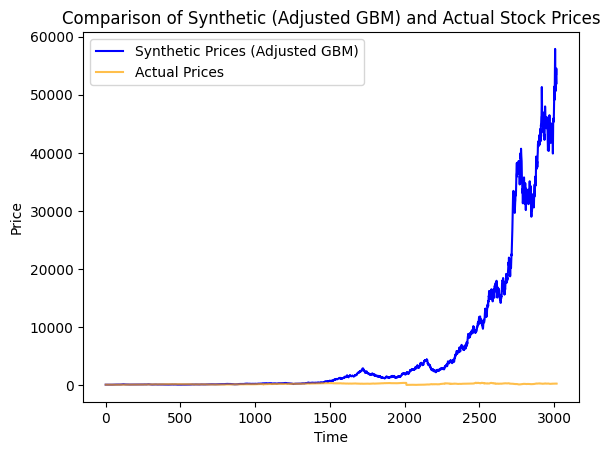

Mean of Synthetic Prices (GBM): 6075.961656169193, Std of Synthetic Prices: 11752.719036204866
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 2.3277207313032267, Kurtosis of Synthetic Prices: 4.345717937845901
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [5]:
# Step 1: Calculate drift (mean return) and volatility (standard deviation) of actual returns
drift = np.mean(data['Daily Return'].dropna())  # Mean of daily returns
volatility = np.std(data['Daily Return'].dropna())  # Standard deviation of daily returns

# Step 2: Adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(data['Daily Return'].dropna())
actual_drift = np.mean(data['Daily Return'].dropna())  # Mean of actual returns

# Adjusting the drift and volatility for synthetic data to match actual data
# You can reduce the drift (mean return) to align with actual data behavior
adjusted_drift = actual_drift  # Use actual mean return for drift
adjusted_volatility = actual_volatility  # Adjust volatility to match actual data volatility

# Step 3: Generate synthetic daily returns using GBM with adjusted drift and volatility
n = len(data['Daily Return'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility * np.sqrt(dt), n)

# Step 4: Convert synthetic returns back to synthetic prices
# Assuming the initial price is the first actual stock price
initial_price = data['Close'].iloc[0]
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm.png')

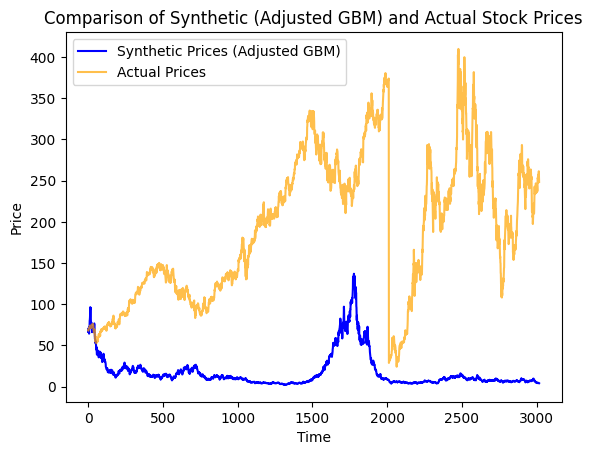

Mean of Synthetic Prices (GBM): 17.585201877624602, Std of Synthetic Prices: 20.755255855393504
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 2.658218991982784, Kurtosis of Synthetic Prices: 7.53942243319146
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [6]:
# Step 1: Calculate log returns (logarithmic returns) for both actual and synthetic prices
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()

# Step 2: Calculate drift (mean return) and volatility (standard deviation) of actual log returns
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 3: Adjust drift and volatility to match actual volatility and mean return
# Adjust the drift and volatility for synthetic data to match actual data behavior
adjusted_drift = drift  # Use actual drift for the synthetic data
adjusted_volatility = volatility  # Adjust volatility to match actual data volatility

# Step 4: Generate synthetic daily returns using GBM with adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility * np.sqrt(dt), n)

# Step 5: Convert synthetic log returns back to synthetic prices
# Assuming the initial price is the first actual stock price
initial_price = data['Close'].iloc[0]
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 6: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 7: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm_log.png')


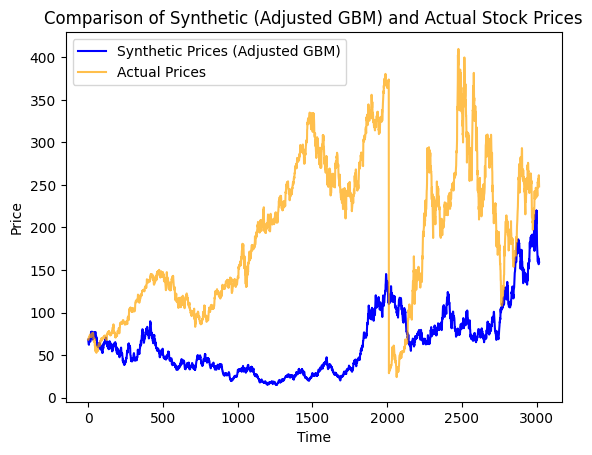

Mean of Synthetic Prices (GBM): 63.71608893311646, Std of Synthetic Prices: 38.446732357963555
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 1.190686075714509, Kurtosis of Synthetic Prices: 1.3394169011258201
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [7]:
# Step 1: Calculate log returns (logarithmic returns) for both actual and synthetic prices
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()

# Step 2: Calculate drift (mean return) and volatility (standard deviation) of actual log returns
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 3: Adjust drift and volatility to match actual volatility and mean return
# Adjust the drift and volatility for synthetic data to match actual data behavior
adjusted_drift = drift  # Use actual drift for the synthetic data
adjusted_volatility = volatility  # Adjust volatility to match actual data volatility

# **Scale down volatility to further reduce the variation**
scaling_factor = 0.6  # Example: Reducing volatility by scaling down
adjusted_volatility_scaled = adjusted_volatility * scaling_factor

# Step 4: Generate synthetic daily returns using GBM with adjusted drift and scaled volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 5: Convert synthetic log returns back to synthetic prices
# Assuming the initial price is the first actual stock price
initial_price = data['Close'].iloc[0]
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 6: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 7: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm_log_scaled.png')

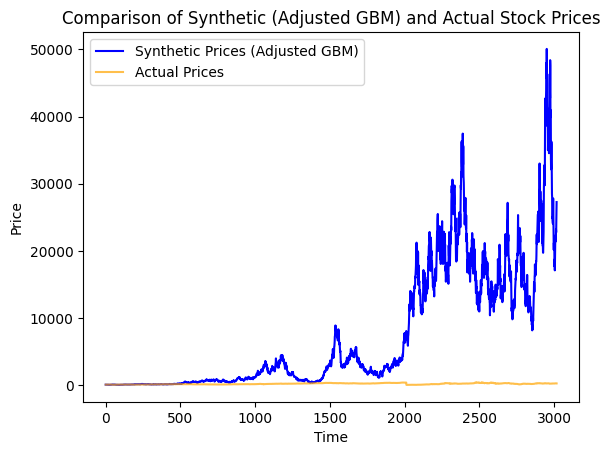

Mean of Synthetic Prices (GBM): 7322.898457516117, Std of Synthetic Prices: 9290.700536311844
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 1.4171659869331077, Kurtosis of Synthetic Prices: 1.5813322034575341
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [8]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Further adjust volatility scaling (scale volatility to match actual data more closely)
scaling_factor = 1.2  # Slightly increase scaling factor to match volatility
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Adjust drift further if needed (reduce drift to match the actual stock's drift)
adjusted_drift = actual_drift  # Use the actual mean return for drift

# Step 3: Generate synthetic daily returns using GBM with adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm_log_scaled_adjusted.png')


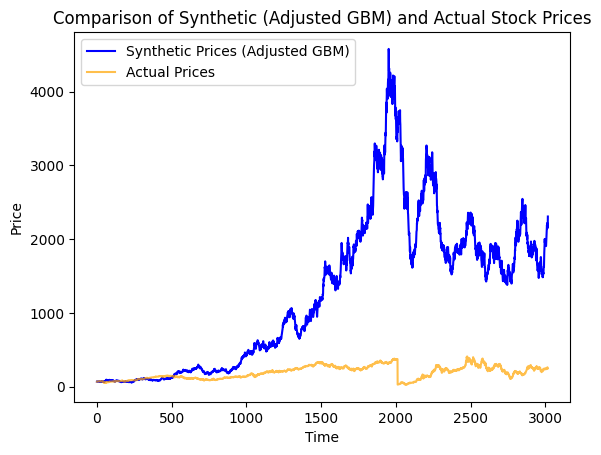

Mean of Synthetic Prices (GBM): 1256.327626892413, Std of Synthetic Prices: 1035.0011789080677
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 0.5914406126200921, Kurtosis of Synthetic Prices: -0.4043966198976907
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [9]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Scale the volatility slightly further to reduce the fluctuations
scaling_factor = 0.5  # Reduce volatility scaling factor to match actual volatility
adjusted_volatility_scaled = volatility * scaling_factor

# Adjust drift to slightly increase it to bring the synthetic data's mean closer to actual data
adjusted_drift = drift * 1.05  # Slightly increase drift if needed

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm_log_scaled_adjusted_further.png')

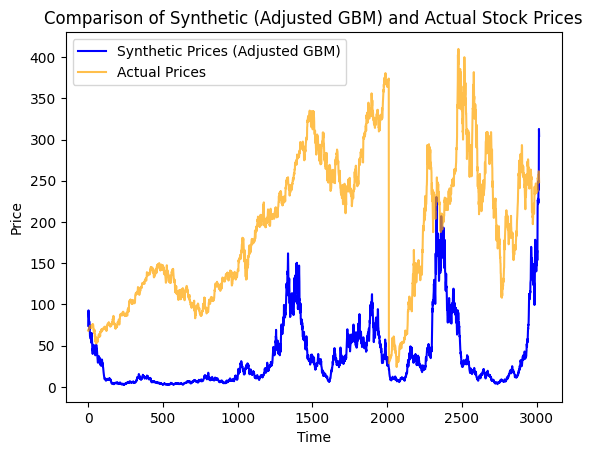

Mean of Synthetic Prices (GBM): 35.48210952531314, Std of Synthetic Prices: 40.599435585763835
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 2.0947330887127946, Kurtosis of Synthetic Prices: 5.127780166830906
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [10]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Further adjust volatility scaling (scale volatility to match actual data more closely)
scaling_factor = 1.5  # Increase the scaling factor slightly to match actual volatility better
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Adjust drift further if needed (increase drift to match the actual stock's drift)
adjusted_drift = actual_drift * 1.1  # Slightly increase drift to improve the mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm_log_scaled_adjusted_further_final.png')


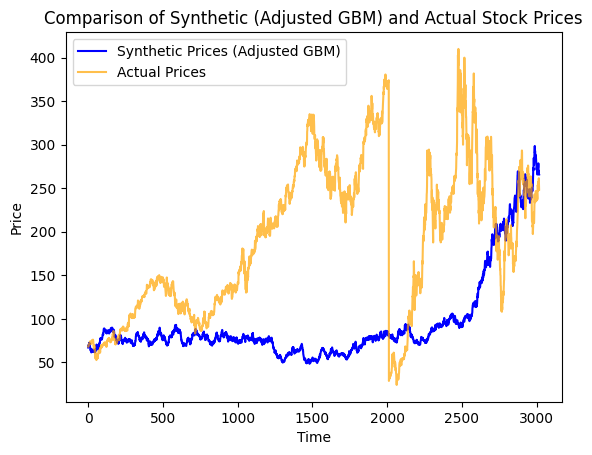

Mean of Synthetic Prices (GBM): 94.76729008397523, Std of Synthetic Prices: 50.741730021466196
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 2.231893662802607, Kurtosis of Synthetic Prices: 3.9670896245119165
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [11]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Reduce volatility scaling (scale volatility down even more to match actual data closely)
scaling_factor = 0.3  # Further reduce the volatility scaling factor to match actual volatility
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Adjust drift down further to match the actual stock's drift and bring the synthetic mean closer
adjusted_drift = actual_drift * 0.8  # Slightly reduce drift to decrease the synthetic price mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm_log_scaled_adjusted_further_final.png')


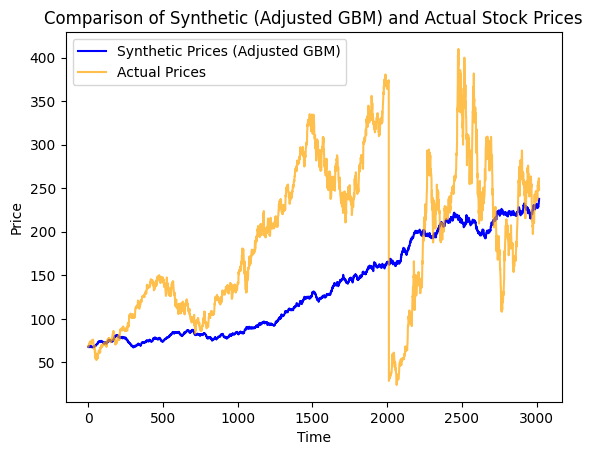

Mean of Synthetic Prices (GBM): 135.57357708575879, Std of Synthetic Prices: 55.824419122757234
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 0.340385266317151, Kurtosis of Synthetic Prices: -1.456525000387282
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [12]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Reduce volatility scaling (scale volatility down significantly to match actual data more closely)
scaling_factor = 0.1  # Significantly reduce the volatility scaling factor to match actual volatility better
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Adjust drift further to match the actual stock's drift and bring the synthetic mean closer
adjusted_drift = actual_drift  # Keep drift equal to actual drift to match the actual mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm_log_scaled_adjusted_further_final.png')


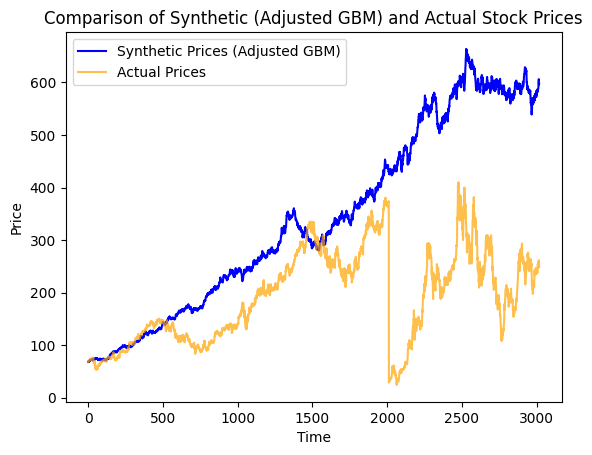

Mean of Synthetic Prices (GBM): 340.77289539159574, Std of Synthetic Prices: 177.72999451678214
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 0.15336461127218162, Kurtosis of Synthetic Prices: -1.2831403283021066
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [13]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Slightly increase volatility scaling (scale volatility up to match actual data more closely)
scaling_factor = 0.15  # Slightly increase the scaling factor to match actual volatility better
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Increase drift slightly more to match the actual stock's drift and bring the synthetic mean closer
adjusted_drift = actual_drift * 1.1  # Increase drift further to improve the synthetic mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm_log_scaled_adjusted_further_final.png')


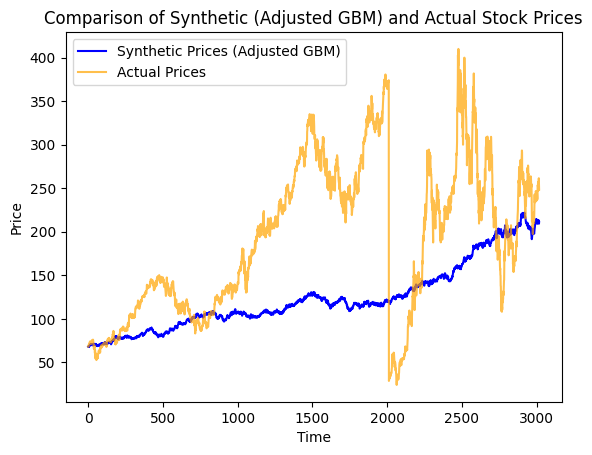

Mean of Synthetic Prices (GBM): 123.64824090163255, Std of Synthetic Prices: 38.10533211616889
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 0.8579889192368632, Kurtosis of Synthetic Prices: -0.0902799543753301
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


<Figure size 640x480 with 0 Axes>

In [14]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Fine-tune volatility scaling (scale volatility to match actual data more closely)
scaling_factor = 0.12  # Reduced scaling factor to match actual volatility better
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Fine-tune drift to match the actual stock's drift and bring the synthetic mean closer
adjusted_drift = actual_drift  # Keep drift equal to actual drift to match the actual mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")

# save image
plt.savefig('../graphs/synthetic_vs_actual_prices_gbm_log_scaled_adjusted_final.png')
